In [151]:
import pandas as pd
import numpy as np
import random

boston = pd.read_csv('Data_Set/housing.csv')
features = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv']

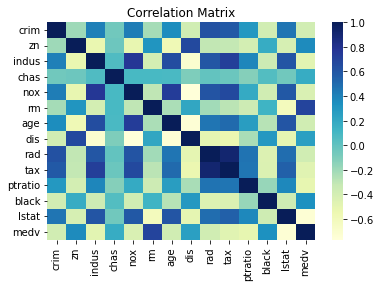

Features with high correlation to the housing prices:
indus
nox
rm
tax
ptratio
lstat


In [152]:
# data cleaning, analysing and removing noise from our model using correlation matrix
import matplotlib.pyplot as plt
import seaborn as sb

boston_frame = pd.DataFrame(boston, columns = features)
correlation_matrix = boston_frame.corr()

# plotting the correlation matrix
dataplot = sb.heatmap(correlation_matrix, cmap = "YlGnBu", annot = False)
dataplot.set_title('Correlation Matrix')
plt.show()

# sourceFile = open('Correlation_Matrix.txt', 'w')
# print(correlation_matirx, file = sourceFile)
# sourceFile.close()

correlation_matirx = np.array(correlation_matrix, dtype = 'float32')

# finding the more correlated features with the target variable
print("Features with high correlation to the housing prices:")

lessCorrelated_features = []
for i in range(len(features) - 1):
    if(abs(correlation_matirx[13][i]) > 0.4):
        print(features[i])
    
    else:
        lessCorrelated_features.append(i)

In [153]:
from sklearn.model_selection import train_test_split

# removing the columns associated with less correlated features
boston_data = np.array(boston_frame, dtype = 'float32')
boston_data = np.delete(boston_data, (lessCorrelated_features), 1)

# removing random outliers from the dataset, that is, the outliers with high values of 'medv'
censored_data = []
for i in range(len(boston_data) - 13):
    if boston_data[i, -1] == 50:
        censored_data.append(i)
boston_data = np.delete(boston_data, (censored_data), 0)

# separating the features and the target variable
features = boston_data[:, :-1]
prices = boston_data[:, -1]

# splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size = 0.2, random_state = 42)

In [154]:
# standardizing the data through feature scaling, mean and standard deviation
def standardize(x):
    return (x - x.mean(axis = 0)) / x.std(axis = 0)

x_train = standardize(x_train)
y_train = standardize(y_train)
x_test = standardize(x_test)
y_test = standardize(y_test)

In [155]:
# cost function and gradient descent functions
def error(m, n, theta, x, y):
    cost = 0

    for i in range(m):
        temp = 0
        for j in range(n + 1):
            if j == 0:
                temp += theta[j]
            else:
                temp += (theta[j] * x[i][j - 1])

        cost += ((temp - y[i]) ** 2)

    return cost / (2 * m)

def gradient_descent(m, n, alpha, theta, x, y):
    temp = np.zeros(n + 1)

    for i in range(m):
        derivation = 0
        for j in range(n + 1):
            if j == 0:
                derivation += theta[j]
            else:
                derivation += (theta[j] * x[i][j - 1])

        derivation = (derivation - y[i])

        for j in range(n + 1):
            if j == 0:
                temp[j] += derivation
            else:
                temp[j] += (derivation * x[i][j - 1])

    temp = alpha * temp / m
    theta -= temp

    return theta

In [156]:
# theta = parameters, aplha = learning rate, iterations = num of gradient descent cycles, m = num of training examples, n = num of features
theta = []
alpha = 0.3
iterations = 75
m = len(y_train)
n = 13 - len(lessCorrelated_features)

# initializing the parameters with random values
for _ in range(n + 1):
    theta.append(random.random())

# adjusting the parameters using gradient descent
for _ in range(iterations):
    theta = gradient_descent(m, n, alpha, theta, x_train, y_train)

In [157]:
print("Training Error:", error(len(y_train), n, theta, x_train, y_train))
print("Validation Error:", error(len(y_test), n, theta, x_test, y_test))

Training Error: 0.13457170907827112
Validation Error: 0.14045900860290514


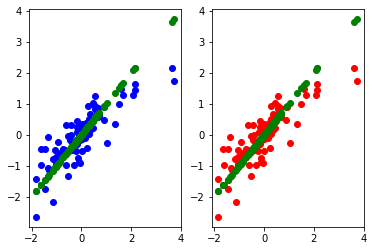

In [158]:
# Comparing the perfromance of the trained hypothesis with sklearn's linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

prices_hypothesis = []
prices_sklearn = []

for i in range(len(y_test)):
    price = 0
    for j in range(n + 1):
        if j == 0:
            price += theta[j]
        else:
            price += (theta[j] * x_test[i][j - 1])
    
    prices_hypothesis.append(price)
    prices_sklearn.append(model.predict((x_test[i]).reshape(1, -1)))

# plotting the graph of the hypothesis vs sklearn's linear regression model
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.scatter(y_test, prices_hypothesis, color = 'blue')
ax1.scatter(y_test, y_test, color = 'green')

ax2.scatter(y_test, prices_sklearn, color = 'red')
ax2.scatter(y_test, y_test, color = 'green')